### Demand Forecasting

- Demand Forecasting is the process in which historical sales data is used to develop an estimate of an expected forecast of customer demand. To businesses, Demand Forecasting provides an estimate of the amount of goods and services that its customers will purchase in the foreseeable future. Critical business assumptions like turnover, profit margins, cash flow, capital expenditure, risk assessment and mitigation plans, capacity planning, etc. are dependent on Demand Forecasting.

- Demand Forecasting is the pivotal business process around which strategic and operational plans of a company are devised. Based on the Demand Forecast, strategic and long-range plans of a business like budgeting, financial planning, sales and marketing plans, capacity planning, risk assessment and mitigation plans are formulated.

- Short to medium term tactical plans like pre-building, make-to-stock, make-to-order, contract manufacturing, supply planning, network balancing, etc. are execution based. Demand Forecasting also facilitates important management activities like decision making, performance evaluation, judicious allocation of resources in a constrained environment and business expansion planning.

### Problem Statement

- One of the largest retail chains in the world wants to use their vast data source to build an efficient forecasting model to predict the sales for each SKU in its portfolio at its 76 different stores using historical sales data for the past 3 years on a week-on-week basis. Sales and promotional information is also available for each week - product and store wise. 

### Data Description

        **Variable**                                          **Definition**

        record_ID                                       Unique ID for each week store sku combination
        
        week                                            Starting Date of the week
        
        store_id                                        Unique ID for each store (no numerical order to be assumed)
        
        sku_id                                          Unique ID for each product (no numerical order to be assumed)
        
        total_price                                     Sales Price of the product
        
        base_price                                      Base price of the product
        
        is_featured_sku                                 Was part of the featured item of the week
        
        is_display_sku                                  Product was on display at a prominent place at the store
        
        units_sold                                      (Target) Total Units sold for that week-store-sku combination

### Sample Submission

          Variable                                                 Description
         
         record_ID                                      Unique ID for each week store sku combination
         
         units_sold                                     (Target) Total Units sold for that week-store-sku combination

<h2 style="color:blue" align="left"> 1. Import necessary Libraries </h2>

In [1]:
# Read Data
import numpy as np                    # Linear Algebra (calculate the mean and standard deviation)
import pandas as pd                   # manipulate data, data processing, load csv file I/O (e.g. pd.read_csv)

# Visualization
import matplotlib.pyplot as plt       # Visualization using matplotlib
%matplotlib inline
import seaborn as sns                 # Visualization using seaborn

# style
plt.style.use("fivethirtyeight")      # Set Graphs Background style using matplotlib
sns.set_style("darkgrid")             # Set Graphs Background style using seaborn

# ML model building; Pre Processing & Evaluation
from sklearn.model_selection import train_test_split                     # split  data into training and testing sets
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor                       # this will make a Random Forest Regression
import xgboost
from xgboost import XGBRegressor                                         # XGBoost Regressor
from sklearn.preprocessing import StandardScaler                         # Standard Scalar
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV                         # this will do cross validation

import warnings                       
warnings.filterwarnings("ignore")     # Ignore Warnings

C:\Users\deepusuresh\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\deepusuresh\Anaconda3\lib\site-packages\dask\dataframe\utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\deepusuresh\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


<h2 style="color:blue" align="left"> 2. Load data </h2>

In [2]:
train = pd.read_csv("train_0irEZ2H.csv")
test = pd.read_csv("test_nfaJ3J5.csv")

In [3]:
display(train.head())
display(test.head())

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52


,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku
0,212645,16/07/13,8091,216418,108.3000,108.3000,0,0
1,212646,16/07/13,8091,216419,109.0125,109.0125,0,0
2,212647,16/07/13,8091,216425,133.9500,133.9500,0,0
3,212648,16/07/13,8091,216233,133.9500,133.9500,0,0
4,212649,16/07/13,8091,217390,176.7000,176.7000,0,0


In [4]:
# checking dimension (num of rows and columns) of dataset
print("Training data shape (Rows, Columns):",train.shape)
print("Test data shape (Rows, Columns):",test.shape)

Training data shape (Rows, Columns): (150150, 9)
Test data shape (Rows, Columns): (13860, 8)


In [5]:
train_original=train.copy() 
test_original=test.copy()

In [6]:
# check dataframe structure like columns and its counts, datatypes & Null Values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   record_ID        150150 non-null  int64  
 1   week             150150 non-null  object 
 2   store_id         150150 non-null  int64  
 3   sku_id           150150 non-null  int64  
 4   total_price      150149 non-null  float64
 5   base_price       150150 non-null  float64
 6   is_featured_sku  150150 non-null  int64  
 7   is_display_sku   150150 non-null  int64  
 8   units_sold       150150 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 10.3+ MB


In [7]:
train.dtypes.value_counts()

int64      6
float64    2
object     1
dtype: int64

- Our dataset features consists of three datatypes
     1. float
     2. integer
     3. object
- All are numerical features.

In [8]:
# check dataframe structure like columns and its counts, datatypes & Null Values
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13860 entries, 0 to 13859
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   record_ID        13860 non-null  int64  
 1   week             13860 non-null  object 
 2   store_id         13860 non-null  int64  
 3   sku_id           13860 non-null  int64  
 4   total_price      13860 non-null  float64
 5   base_price       13860 non-null  float64
 6   is_featured_sku  13860 non-null  int64  
 7   is_display_sku   13860 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 866.4+ KB


In [9]:
test.dtypes.value_counts()

int64      5
float64    2
object     1
dtype: int64

- Our dataset features consists of three datatypes
     1. float
     2. integer
     3. object
- All are numerical features.

In [10]:
# Gives number of data points in each variable
display(train.count())
display(test.count())

record_ID          150150
week               150150
store_id           150150
sku_id             150150
total_price        150149
base_price         150150
is_featured_sku    150150
is_display_sku     150150
units_sold         150150
dtype: int64

record_ID          13860
week               13860
store_id           13860
sku_id             13860
total_price        13860
base_price         13860
is_featured_sku    13860
is_display_sku     13860
dtype: int64

<h2 style="color:blue" align="left"> 3. EDA (Exploratory Data Analysis) </h2>

- EDA is a way of **Visualizing, Summarizing and interpreting** the information that is **hidden in rows and column** format.

### 1. Find Missing Values

- Checking missing values by below methods:

     1. df.isnull().sum()
        - It returns null values for each column
          
     2. isnull().any()
        - It returns True if column have NULL Values
        - It returns False if column don't have NULL Values
          
     3. Heatmap()
        - Missing value representation using heatmap.
          
     4. Percentage of Missing values

In [10]:
# Listing Number of missing values by feature column wise
train.isnull().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        1
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

In [11]:
# Listing Number of missing values by feature column wise
test.isnull().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        0
base_price         0
is_featured_sku    0
is_display_sku     0
dtype: int64

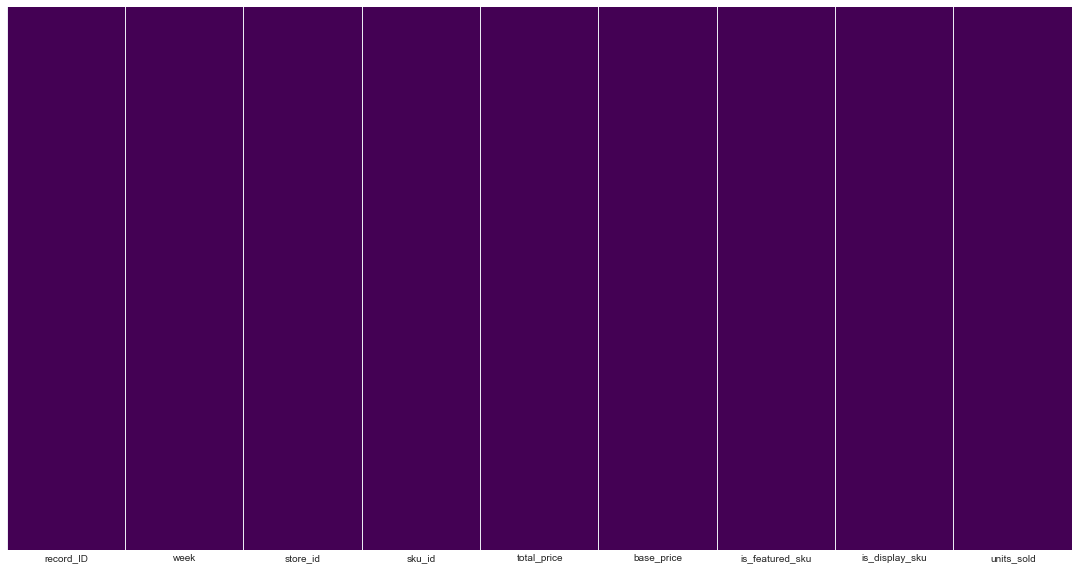

In [12]:
plt.figure(figsize=(17,10))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

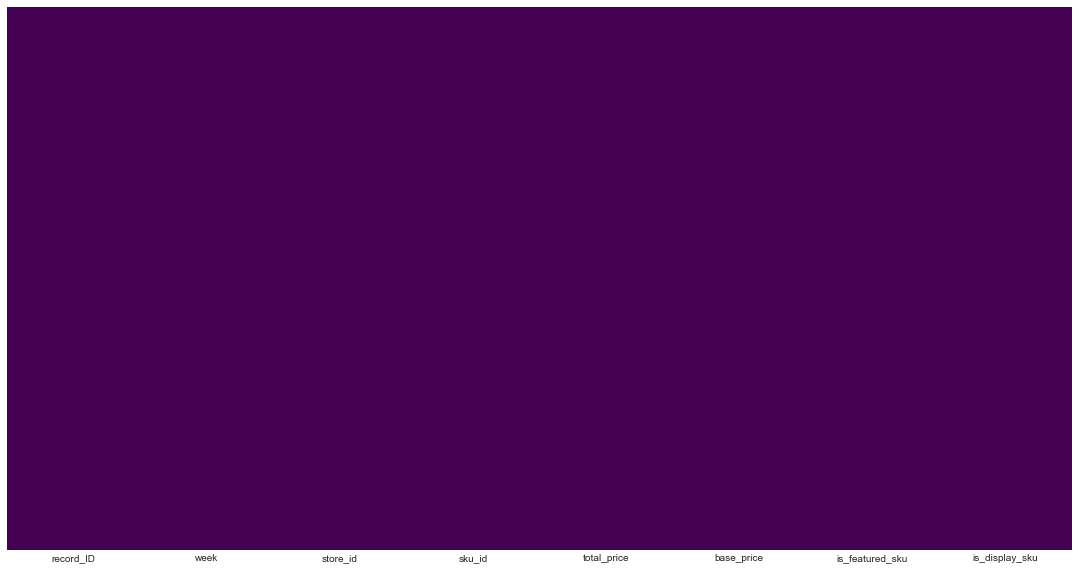

In [13]:
plt.figure(figsize=(17,10))
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### 13. Explore the Correlation between numerical features

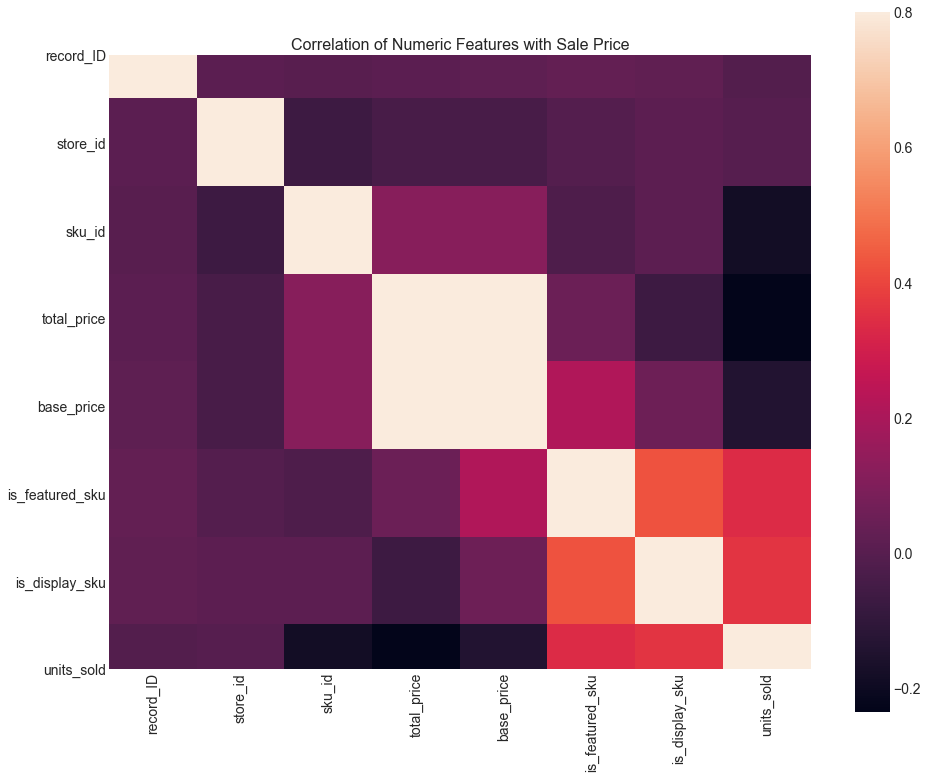

In [17]:
plt.figure(figsize = (14,12))
plt.title('Correlation of Numeric Features with Sale Price', y=1, size=16)
sns.heatmap(train.corr(), square = True, vmax=0.8)

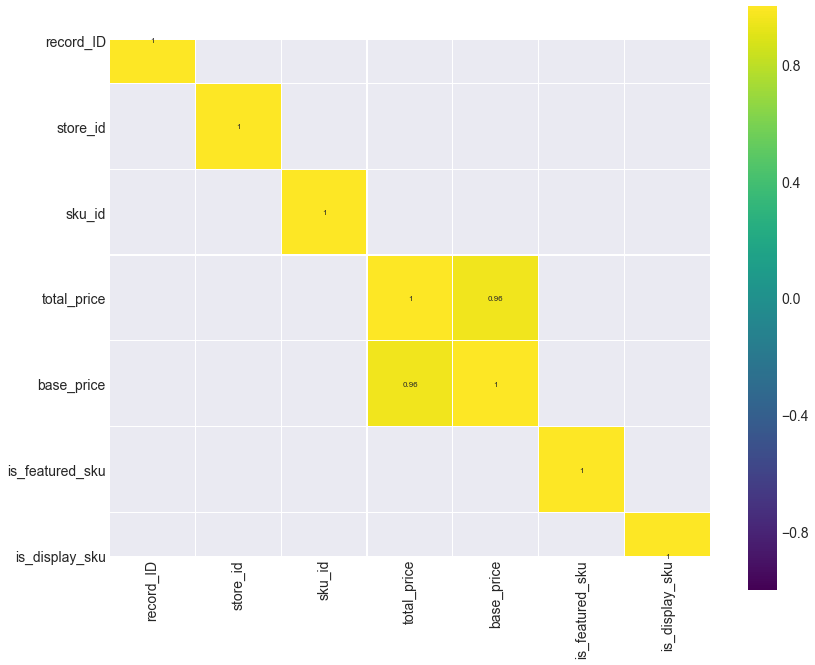

In [20]:
corr = train.drop('units_sold', axis=1).corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

### 14. Descriptive statistics

In [11]:
# descriptive statistics
train.describe()

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
count,150150.000000,150150.000000,150150.000000,150149.000000,150150.000000,150150.000000,150150.000000,150150.000000
mean,106271.555504,9199.422511,254761.132468,206.626751,219.425927,0.095611,0.133200,51.674206
std,61386.037861,615.591445,85547.306447,103.308516,110.961712,0.294058,0.339792,60.207904
min,1.000000,8023.000000,216233.000000,41.325000,61.275000,0.000000,0.000000,1.000000
25%,53111.250000,8562.000000,217217.000000,130.387500,133.237500,0.000000,0.000000,20.000000
50%,106226.500000,9371.000000,222087.000000,198.075000,205.912500,0.000000,0.000000,35.000000
75%,159452.750000,9731.000000,245338.000000,233.700000,234.412500,0.000000,0.000000,62.000000
max,212644.000000,9984.000000,679023.000000,562.162500,562.162500,1.000000,1.000000,2876.000000


In [12]:
train['total_price'] = train['total_price'].fillna(train['total_price'].mean())  # float

<h2 style="color:blue" align="left"> 7. Model building and Evaluation </h2>

In [13]:
train.drop(columns=['record_ID','week'], inplace=True, axis=1)
test.drop(columns=['record_ID','week'], inplace=True, axis=1)

In [14]:
display(train.head())
display(test.head())

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,8091,216418,99.0375,111.8625,0,0,20
1,8091,216419,99.0375,99.0375,0,0,28
2,8091,216425,133.9500,133.9500,0,0,19
3,8091,216233,133.9500,133.9500,0,0,44
4,8091,217390,141.0750,141.0750,0,0,52


,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku
0,8091,216418,108.3000,108.3000,0,0
1,8091,216419,109.0125,109.0125,0,0
2,8091,216425,133.9500,133.9500,0,0
3,8091,216233,133.9500,133.9500,0,0
4,8091,217390,176.7000,176.7000,0,0


In [15]:
# Independant variable
X = train.iloc[:,:-1]             # All rows & columns exclude Target features

# Dependant variable
y = train['units_sold']           # Only target feature

In [16]:
# split  data into training and testing sets of 80:20 ratio
# 20% of test size selected
# random_state is random seed
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=4)

In [17]:
# shape of X & Y test / train
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120120, 6) (30030, 6) (120120,) (30030,)


In [18]:
sc = StandardScaler()
X_train_Scaled = sc.fit_transform(X_train)
X_test_Scaled = sc.transform(X_test)

### Random Forest Regressor

In [19]:
rf = RandomForestRegressor()
rf.fit(X_train_Scaled, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [20]:
y_pred = rf.predict(X_test_Scaled)

In [21]:
print("Train Score {:.2f} & Test Score {:.2f}".format(rf.score(X_train_Scaled, y_train),rf.score(X_test_Scaled, y_test)))

Train Score 0.92 & Test Score 0.71


In [22]:
y_pred_test = rf.predict(test)

In [23]:
y_pred_test.shape

(13860,)

### XGBOOST

In [12]:
xgb = xgboost.XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [14]:
# predicting X_test
y_pred_xgb = xgb.predict(X_test)

In [15]:
y_pred_xgb.shape

(30030,)

In [16]:
print("Train Score {:.2f} & Test Score {:.2f}".format(xgb.score(X_train,y_train),xgb.score(X_test,y_test)))

Train Score 0.84 & Test Score 0.77


In [17]:
test.shape

(13860, 6)

In [18]:
y_pred_xgb = xgb.predict(test)

### Submission

In [20]:
submission = pd.DataFrame({'record_ID': test_original['record_ID'], 'units_sold': y_pred_xgb})
submission.to_csv('Demand.csv', index=False)